In [1]:
weather = pd.read_csv("../weather2_180701.csv")
weather['date'] = pd.to_datetime(weather["date"])
station = weather[weather['station_nbr'] == 1]

In [2]:
station.tail()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,avgspeed,year,month,day,relative_humility,windchill,daytime,week7,weekend,code_change
1030,1,2014-10-27,61.0,41.0,51.0,NaN,38.0,44.0,14.0,0.0,...,7.3,2014,10,27,60.947558,48.266239,NaN,0,0,0
1031,1,2014-10-28,65.0,37.0,51.0,NaN,45.0,48.0,14.0,0.0,...,3.6,2014,10,28,79.853021,50.316460,NaN,1,0,1
1032,1,2014-10-29,66.0,48.0,57.0,NaN,51.0,53.0,8.0,0.0,...,4.4,2014,10,29,80.320545,56.738033,NaN,2,0,2
1033,1,2014-10-30,57.0,39.0,48.0,NaN,39.0,43.0,17.0,0.0,...,3.7,2014,10,30,70.872191,46.795606,NaN,3,0,0
1034,1,2014-10-31,53.0,40.0,46.5,NaN,36.0,41.0,18.0,0.0,...,5.8,2014,10,31,66.647959,43.613607,NaN,4,0,0


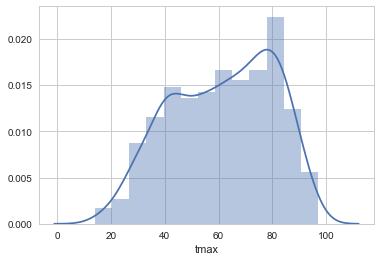

In [3]:
sns.distplot(station.tmax, kde=True)
plt.show()

In [4]:
for i in station.columns:
    count_null = station[i].isna().sum()
    print(i, ":", count_null, "(",round((count_null / len(station) * 100),2),"%",")")

station_nbr : 0 ( 0.0 % )
date : 0 ( 0.0 % )
tmax : 0 ( 0.0 % )
tmin : 0 ( 0.0 % )
tavg : 0 ( 0.0 % )
depart : 1035 ( 100.0 % )
dewpoint : 0 ( 0.0 % )
wetbulb : 0 ( 0.0 % )
heat : 0 ( 0.0 % )
cool : 0 ( 0.0 % )
sunrise : 1035 ( 100.0 % )
sunset : 1035 ( 100.0 % )
codesum : 0 ( 0.0 % )
snowfall : 1035 ( 100.0 % )
preciptotal : 0 ( 0.0 % )
stnpressure : 0 ( 0.0 % )
sealevel : 0 ( 0.0 % )
resultspeed : 0 ( 0.0 % )
resultdir : 4 ( 0.39 % )
avgspeed : 0 ( 0.0 % )
year : 0 ( 0.0 % )
month : 0 ( 0.0 % )
day : 0 ( 0.0 % )
relative_humility : 0 ( 0.0 % )
windchill : 0 ( 0.0 % )
daytime : 1035 ( 100.0 % )
week7 : 0 ( 0.0 % )
weekend : 0 ( 0.0 % )
code_change : 0 ( 0.0 % )


In [5]:
train = pd.read_csv("../data/train.csv")
train.tail()

,date,store_nbr,item_nbr,units
4617595,2014-10-31,45,107,0
4617596,2014-10-31,45,108,0
4617597,2014-10-31,45,109,0
4617598,2014-10-31,45,110,0
4617599,2014-10-31,45,111,0


In [6]:
train.date = pd.to_datetime(train.date)

In [7]:
key = pd.read_csv("../data/key.csv")
station = station.merge(key)

In [8]:
station = station.merge(train)
station.tail()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,day,relative_humility,windchill,daytime,week7,weekend,code_change,store_nbr,item_nbr,units
103114,1,2014-10-31,53.0,40.0,46.5,NaN,36.0,41.0,18.0,0.0,...,31,66.647959,43.613607,NaN,4,0,0,1,107,0
103115,1,2014-10-31,53.0,40.0,46.5,NaN,36.0,41.0,18.0,0.0,...,31,66.647959,43.613607,NaN,4,0,0,1,108,0
103116,1,2014-10-31,53.0,40.0,46.5,NaN,36.0,41.0,18.0,0.0,...,31,66.647959,43.613607,NaN,4,0,0,1,109,0
103117,1,2014-10-31,53.0,40.0,46.5,NaN,36.0,41.0,18.0,0.0,...,31,66.647959,43.613607,NaN,4,0,0,1,110,0
103118,1,2014-10-31,53.0,40.0,46.5,NaN,36.0,41.0,18.0,0.0,...,31,66.647959,43.613607,NaN,4,0,0,1,111,0


In [9]:
station['log1p_units'] = np.log1p(station.units)

In [10]:
station.tail()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,relative_humility,windchill,daytime,week7,weekend,code_change,store_nbr,item_nbr,units,log1p_units
103114,1,2014-10-31,53.0,40.0,46.5,NaN,36.0,41.0,18.0,0.0,...,66.647959,43.613607,NaN,4,0,0,1,107,0,0.0
103115,1,2014-10-31,53.0,40.0,46.5,NaN,36.0,41.0,18.0,0.0,...,66.647959,43.613607,NaN,4,0,0,1,108,0,0.0
103116,1,2014-10-31,53.0,40.0,46.5,NaN,36.0,41.0,18.0,0.0,...,66.647959,43.613607,NaN,4,0,0,1,109,0,0.0
103117,1,2014-10-31,53.0,40.0,46.5,NaN,36.0,41.0,18.0,0.0,...,66.647959,43.613607,NaN,4,0,0,1,110,0,0.0
103118,1,2014-10-31,53.0,40.0,46.5,NaN,36.0,41.0,18.0,0.0,...,66.647959,43.613607,NaN,4,0,0,1,111,0,0.0


In [11]:
station = station[station["units"] > 0].reset_index(drop=True)

In [12]:
station.columns

Index(['station_nbr', 'date', 'tmax', 'tmin', 'tavg', 'depart', 'dewpoint',
       'wetbulb', 'heat', 'cool', 'sunrise', 'sunset', 'codesum', 'snowfall',
       'preciptotal', 'stnpressure', 'sealevel', 'resultspeed', 'resultdir',
       'avgspeed', 'year', 'month', 'day', 'relative_humility', 'windchill',
       'daytime', 'week7', 'weekend', 'code_change', 'store_nbr', 'item_nbr',
       'units', 'log1p_units'],
      dtype='object')

In [20]:
model = sm.OLS.from_formula('np.log1p(units) ~ scale(I(tmax**2)) + scale(I(tmin**2)) + scale(I(tavg**2)) + scale(dewpoint) + scale(wetbulb) + scale(heat) + scale(cool) \
                            + scale(preciptotal) + scale(stnpressure) + scale(sealevel) + scale(resultspeed) \
                            + scale(avgspeed) + scale(relative_humility) + scale(windchill) + C(item_nbr) + C(store_nbr) + C(code_change) + C(weekend) + 0', data=station)
result = model.fit()

In [21]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:        np.log1p(units)   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     195.6
Date:                Mon, 02 Jul 2018   Prob (F-statistic):               0.00
Time:                        16:08:53   Log-Likelihood:                -2649.1
No. Observations:                2877   AIC:                             5348.
Df Residuals:                    2852   BIC:                             5497.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
C(item_nbr)[9]          

In [28]:
station['tmax_log1p'] = np.log1p(station.tmax)

In [37]:
station['log1p_tmax^2'] = np.log1p(station['tmax^2'])

In [30]:
station['tmin^2'] = station.tmin ** 2

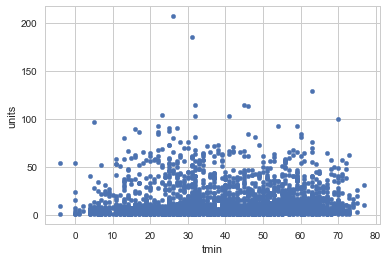

In [32]:
station.plot.scatter('tmin','units')
plt.show()

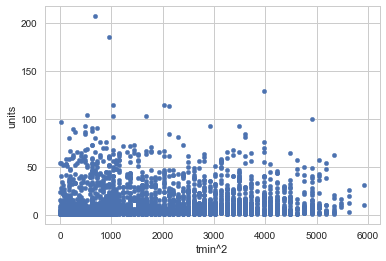

In [33]:
station.plot.scatter('tmin^2','units')
plt.show()

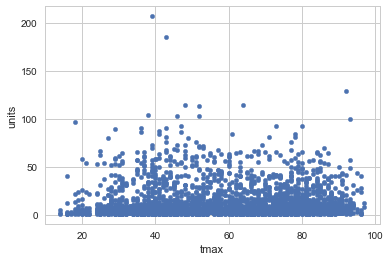

In [35]:
station.plot.scatter('tmax','units')
plt.show()

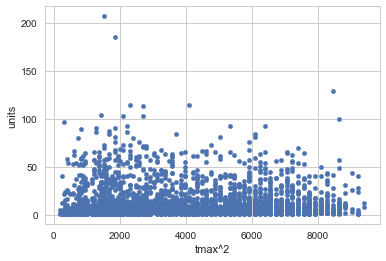

In [36]:
station.plot.scatter('tmax^2','units')
plt.show()

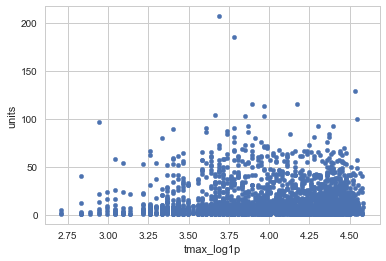

In [38]:
station.plot.scatter('tmax_log1p','units')
plt.show()

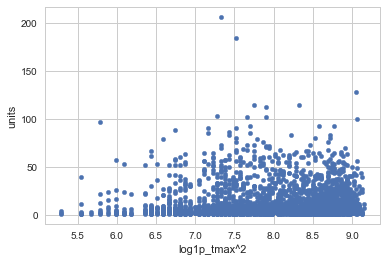

In [39]:
station.plot.scatter('log1p_tmax^2','units')
plt.show()

In [27]:
np.log1p(station.tmax)

0       3.970292
1       3.970292
2       3.970292
3       3.931826
4       3.931826
5       3.931826
6       3.496508
7       3.496508
8       3.367296
9       3.367296
10      3.663562
11      3.663562
12      3.850148
13      3.850148
14      4.060443
15      4.060443
16      3.828641
17      3.828641
18      3.828641
19      3.688879
20      3.688879
21      3.688879
22      3.871201
23      3.688879
24      3.688879
25      3.688879
26      3.688879
27      3.713572
28      3.713572
29      3.713572
          ...   
2847    4.276666
2848    4.276666
2849    4.262680
2850    4.262680
2851    4.262680
2852    4.025352
2853    4.025352
2854    4.025352
2855    4.025352
2856    4.127134
2857    4.127134
2858    4.127134
2859    4.189655
2860    4.189655
2861    4.189655
2862    4.189655
2863    4.204693
2864    4.204693
2865    4.204693
2866    4.204693
2867    4.204693
2868    4.204693
2869    4.060443
2870    4.060443
2871    4.060443
2872    4.060443
2873    3.988984
2874    3.9889